# ALI Performance Tests on Waterman

## Introduction
Currently testing the Greenland Ice Sheet (GIS) in Albany Land Ice (ALI) using Nvidia Tesla V100 GPUs on waterman.

### Architectures: 
| Name | Waterman (P9/V100) |
|---|---|
| CPU | Dual-socket IBM POWER9 |
| GPU | Nvidia Tesla V100 |
| Cores/Node | 40 |
| Threads/Core | 8 |
| GPUs/Node | 4 |
| Memory/Node | 319 GB |
| Interconnect | Mellanox EDR IB (100 GB/s) |
| Compiler | gcc 7.2.0 |
| GPU Compiler | cuda 10.1.105 |
| MPI | openmpi 4.0.1 |

### Cases: 
| Case Name  | Number of Processes (np) | Description |
|---|---|---|
| greenland-1-7km_fea_1ws | 8 | Unstructured 1-7km GIS, finite element assembly only, single workset |
| greenland-1-7km_fea_mem | 8 | Unstructured 1-7km GIS, finite element assembly only, memoization |

### Timers: 
| Timer Name | Level | Description |
|---|---|---|
| Albany Total Time | 0 | Total wall-clock time of simulation |
| Albany: Setup Time | 1 | Preprocess |
| Albany: Total Fill Time | 1 | Finite element assembly |
| Albany Fill: Residual | 2 | Residual assembly |
| Albany Residual Fill: Evaluate | 3 | Compute the residual, local/global assembly |
| Albany Residual Fill: Export | 3 | Update global residual across MPI ranks |
| Albany Fill: Jacobian | 2 | Jacobian assembly |
| Albany Jacobian Fill: Evaluate | 3 | Compute the Jacobian, local/global assembly |
| Albany Jacobian Fill: Export | 3 | Update global Jacobian across MPI ranks |
| NOX Total Preconditioner Construction | 1 | Construct Preconditioner |
| NOX Total Linear Solve | 1 | Linear Solve |

In [4]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Import scripts
from json2status import json2status
from json2timeline import json2timeline

# Extract file names
files = glob.glob('ctest-*')

## Performance Tests Status

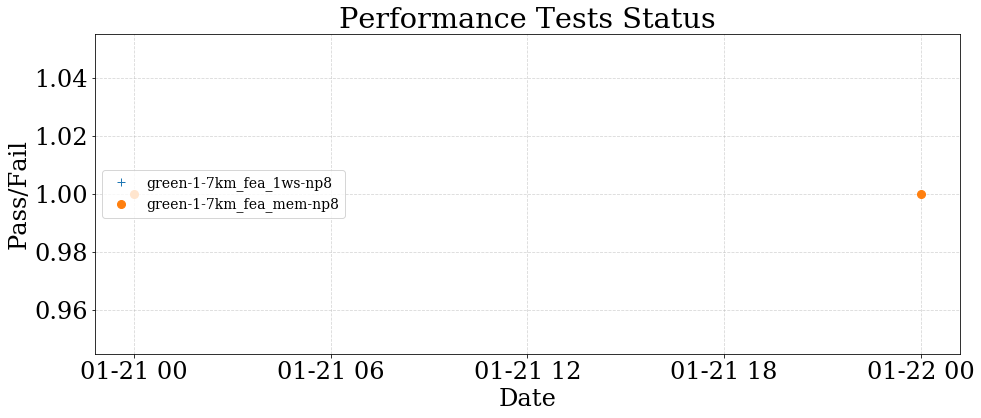

In [5]:
%matplotlib inline
#plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (14, 6)

# Cases to plot:
cases = ('green-1-7km_fea_1ws',
         'green-1-7km_fea_mem')
np = 8

# Plot:
plt.figure()
imarker = 0
markers = ['+','o','*','x','v','d','^','s','>','<','+']
legNames = []
for case in cases:
    # Extract info and plot
    dates, status = json2status(files, case, np)
    fdates = [dt.datetime.strptime(str(d),'%Y%m%d').date() for d in dates]
    plt.plot(fdates, status, markersize=8.0, marker=markers[imarker], linestyle='None')
    imarker = imarker + 1
    legNames.append(case+'-np'+str(np))
        
plt.xlabel('Date')
plt.ylabel('Pass/Fail')
#plt.ylim((6e-3, 1e-1))
plt.legend(legNames,fontsize=14,loc='center left')
plt.tight_layout()
plt.title('Performance Tests Status')
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(linestyle='--', alpha=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.tick_params(axis='x',rotation = 45)
plt.show()


## Performance Timelines

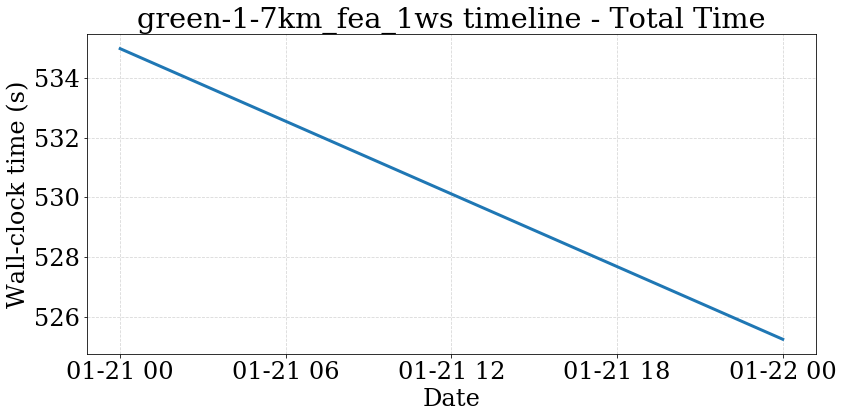

Dates:  (20200121, 20200122)
Wall-clock Time:  (534.977, 525.245)


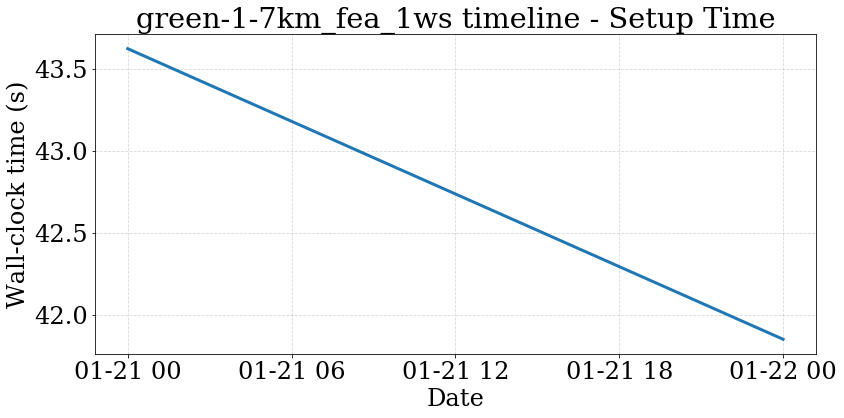

Dates:  (20200121, 20200122)
Wall-clock Time:  (43.6222, 41.8508)


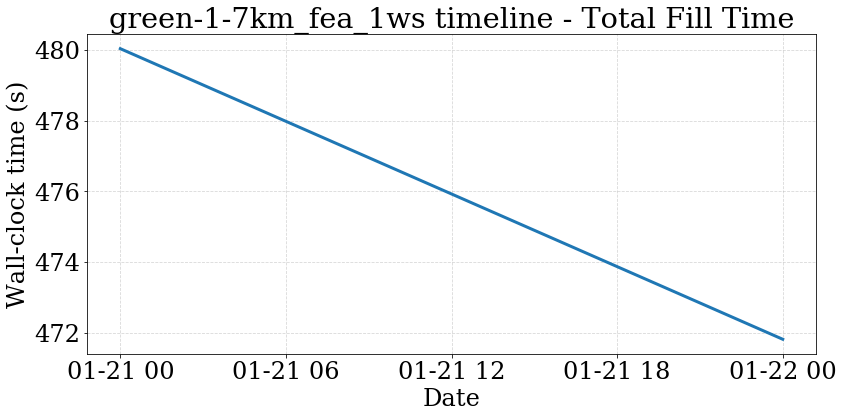

Dates:  (20200121, 20200122)
Wall-clock Time:  (480.036, 471.823)


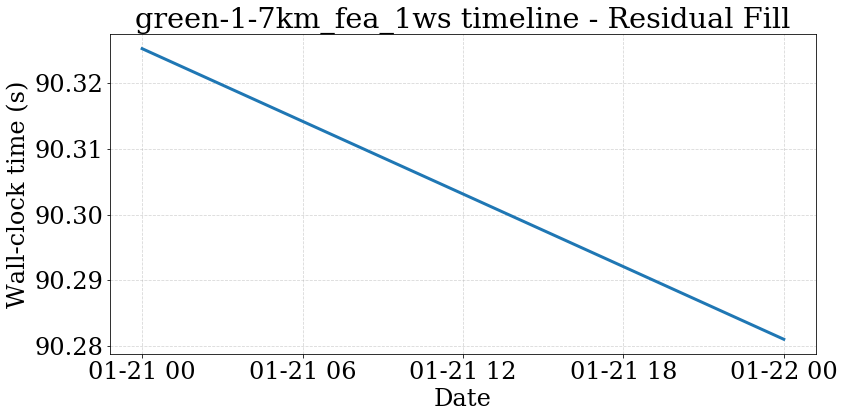

Dates:  (20200121, 20200122)
Wall-clock Time:  (90.3253, 90.281)


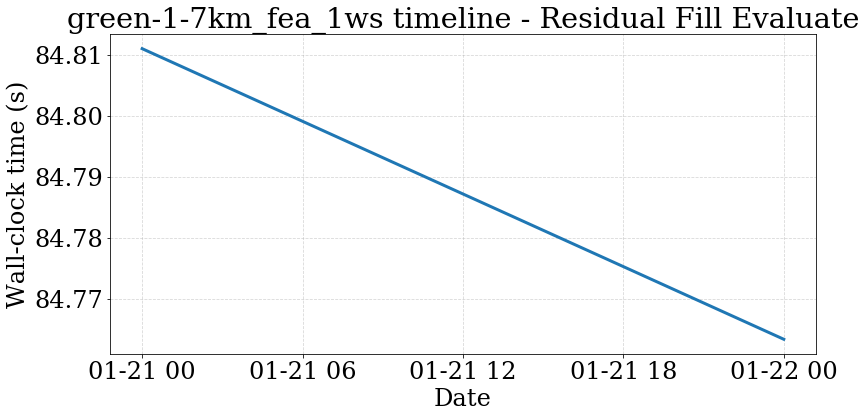

Dates:  (20200121, 20200122)
Wall-clock Time:  (84.8111, 84.7633)


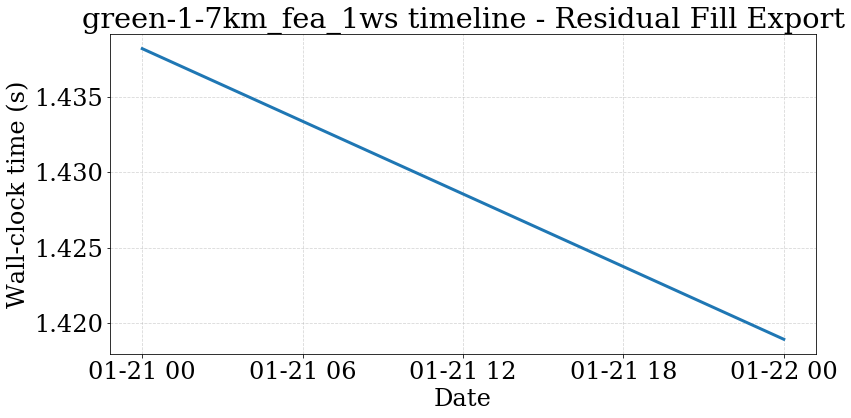

Dates:  (20200121, 20200122)
Wall-clock Time:  (1.43818, 1.41895)


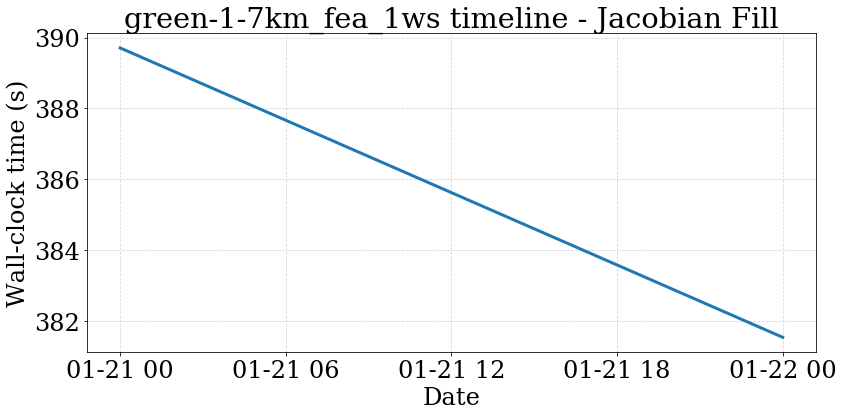

Dates:  (20200121, 20200122)
Wall-clock Time:  (389.706, 381.538)


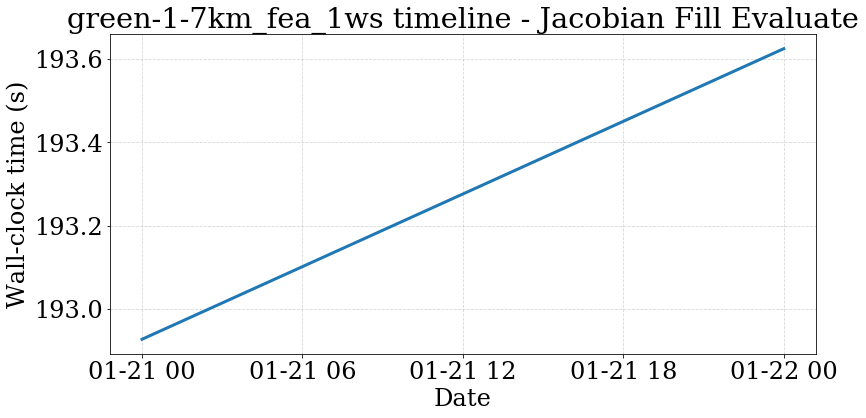

Dates:  (20200121, 20200122)
Wall-clock Time:  (192.928, 193.625)


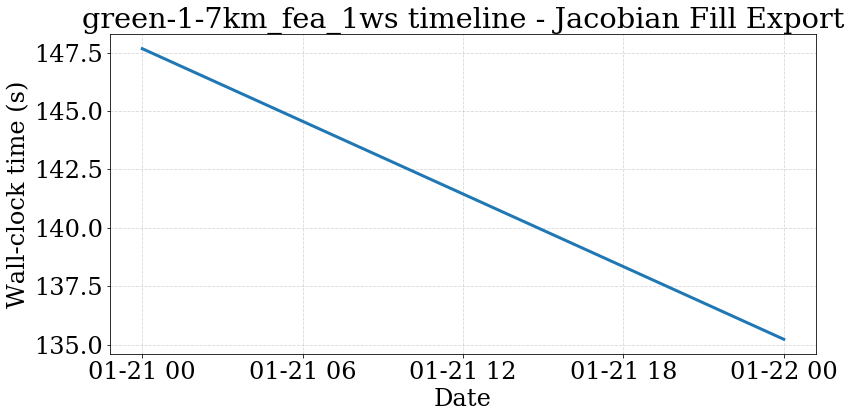

Dates:  (20200121, 20200122)
Wall-clock Time:  (147.672, 135.225)


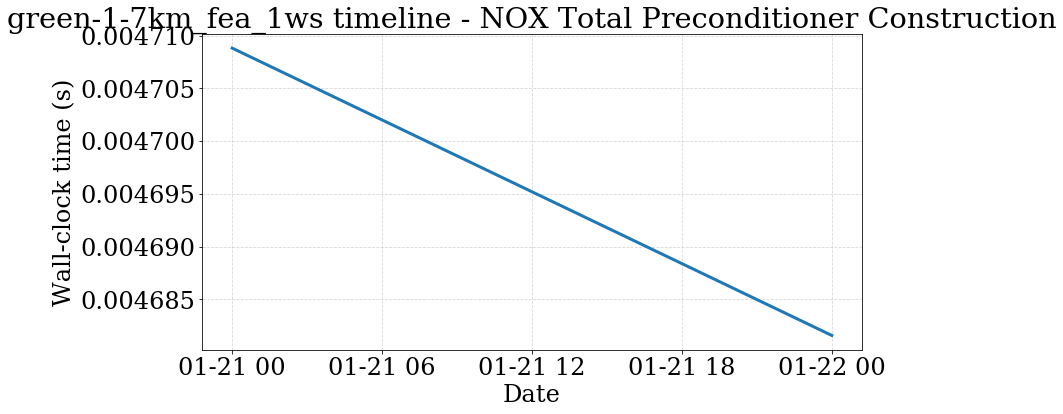

Dates:  (20200121, 20200122)
Wall-clock Time:  (0.00470881, 0.00468157)


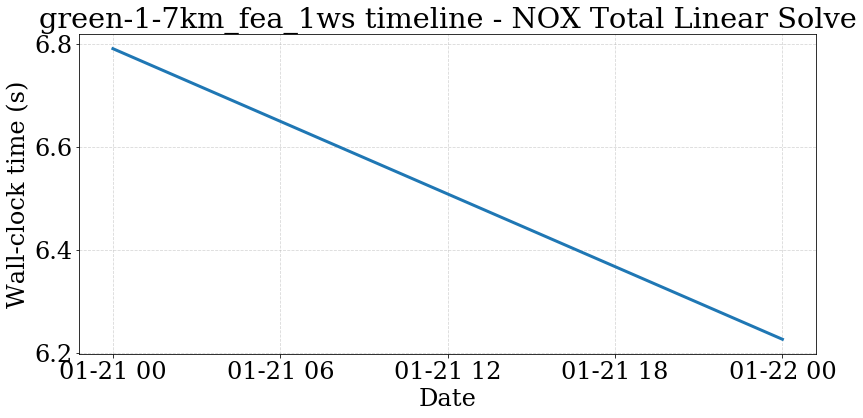

Dates:  (20200121, 20200122)
Wall-clock Time:  (6.79107, 6.22717)


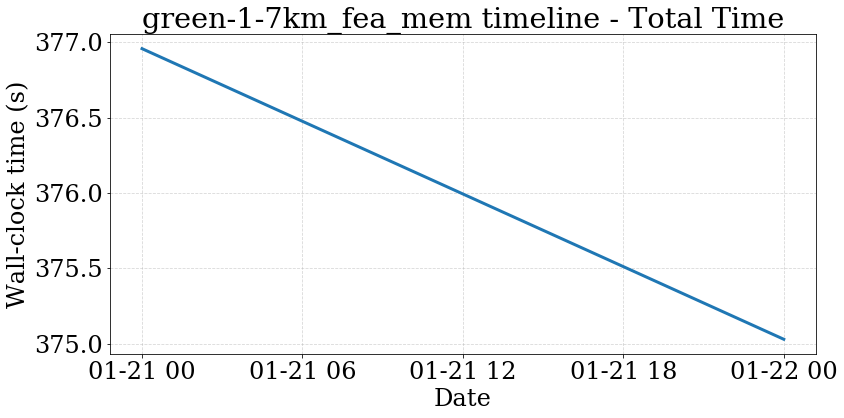

Dates:  (20200121, 20200122)
Wall-clock Time:  (376.958, 375.03)


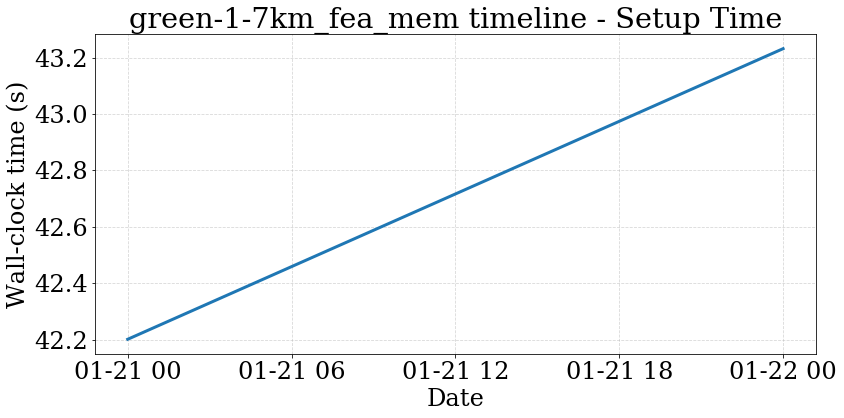

Dates:  (20200121, 20200122)
Wall-clock Time:  (42.201, 43.2317)


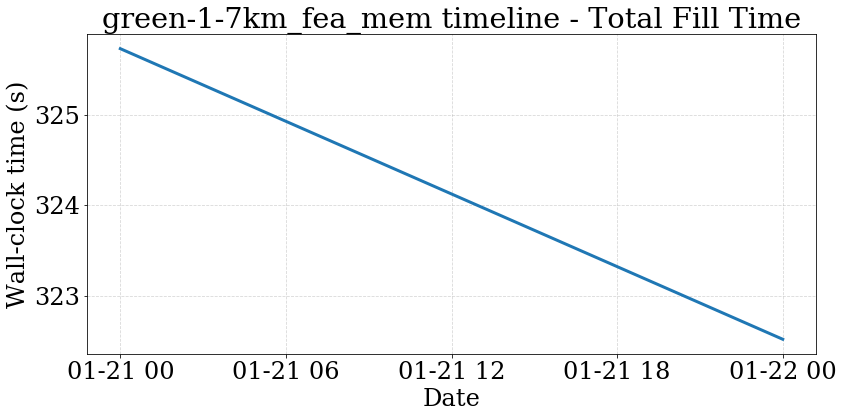

Dates:  (20200121, 20200122)
Wall-clock Time:  (325.726, 322.523)


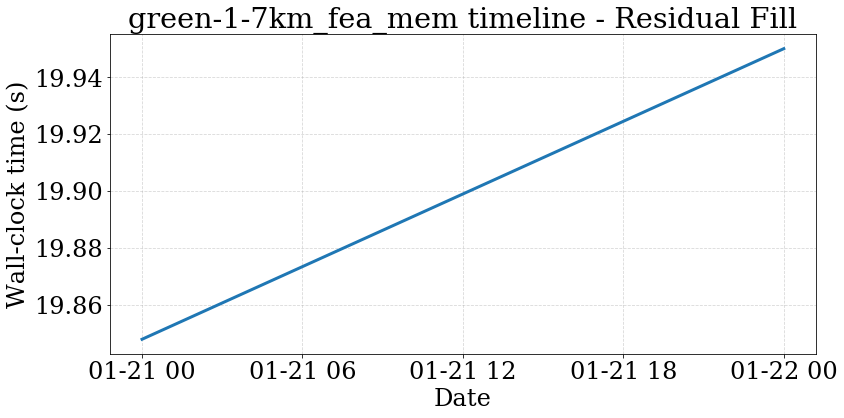

Dates:  (20200121, 20200122)
Wall-clock Time:  (19.8481, 19.9501)


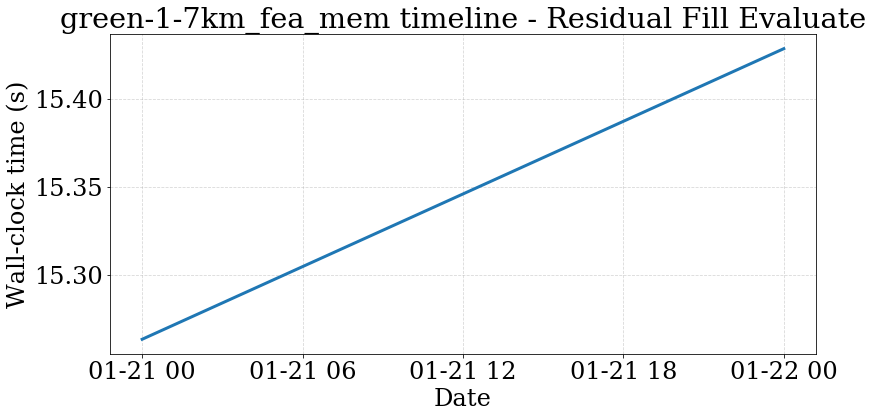

Dates:  (20200121, 20200122)
Wall-clock Time:  (15.2639, 15.4282)


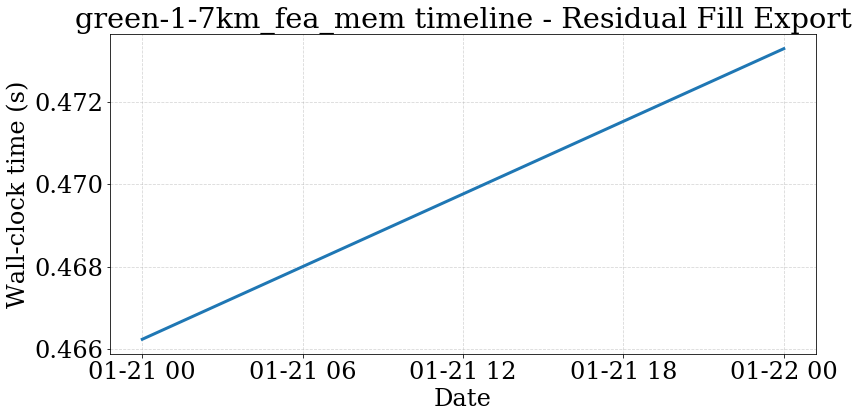

Dates:  (20200121, 20200122)
Wall-clock Time:  (0.466231, 0.473305)


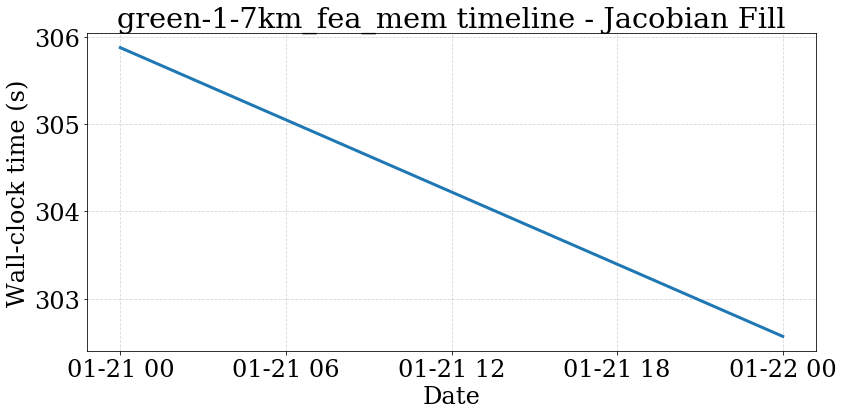

Dates:  (20200121, 20200122)
Wall-clock Time:  (305.873, 302.569)


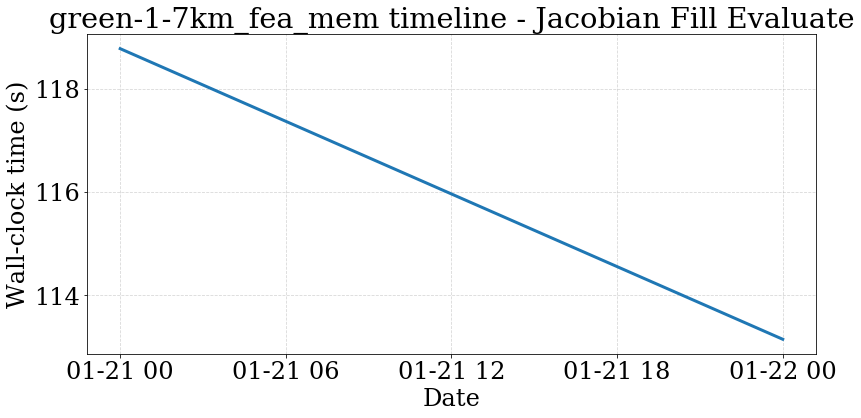

Dates:  (20200121, 20200122)
Wall-clock Time:  (118.781, 113.151)


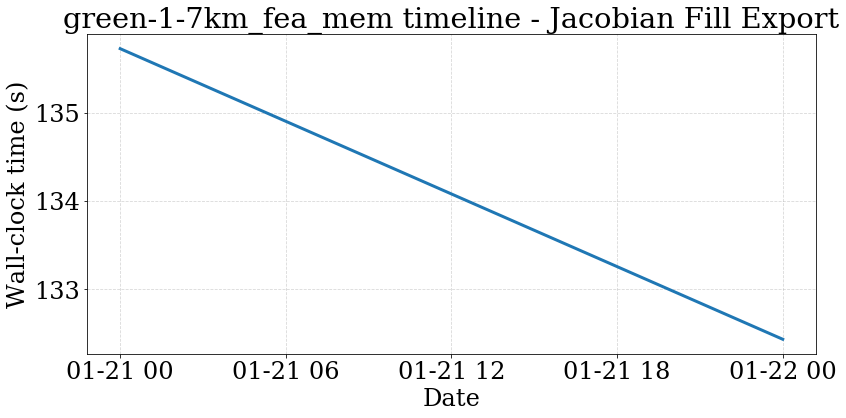

Dates:  (20200121, 20200122)
Wall-clock Time:  (135.733, 132.435)


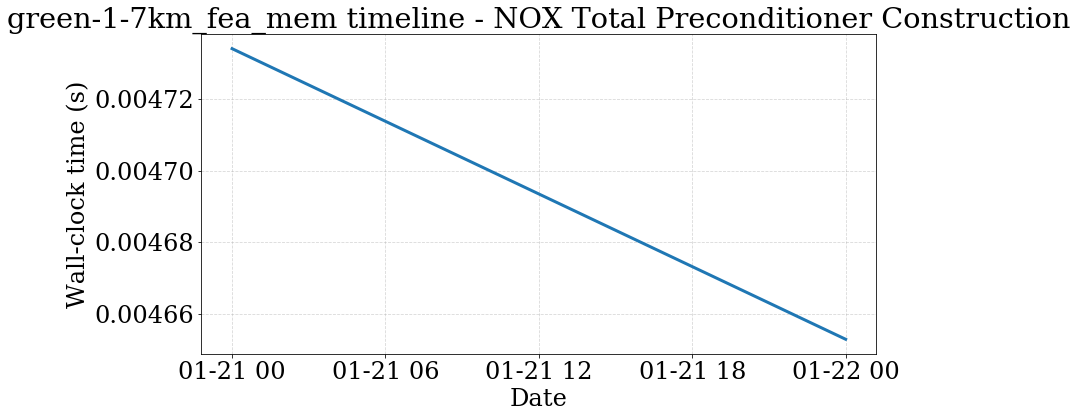

Dates:  (20200121, 20200122)
Wall-clock Time:  (0.00473408, 0.00465294)


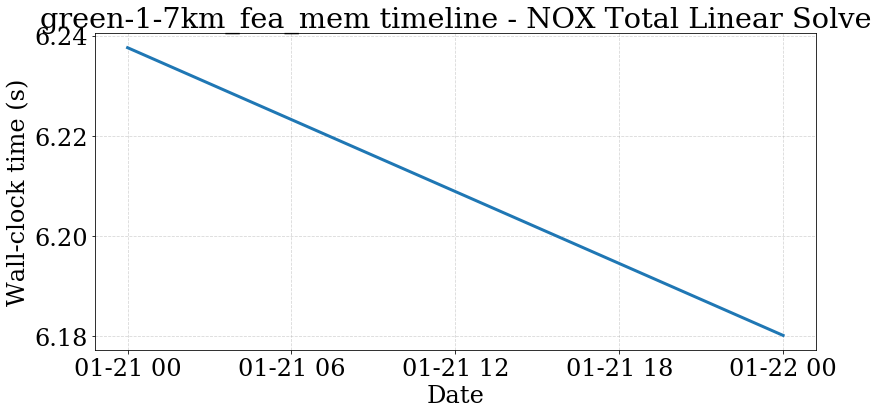

Dates:  (20200121, 20200122)
Wall-clock Time:  (6.23758, 6.18013)


In [6]:
%matplotlib inline
#plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (12, 6)

# Cases to plot:
cases = ('green-1-7km_fea_1ws',
         'green-1-7km_fea_mem')
np = 8
names =  ('Total Time',
          'Setup Time',
          'Total Fill Time',
          'Residual Fill',
          'Residual Fill Evaluate',
          'Residual Fill Export',
          'Jacobian Fill',
          'Jacobian Fill Evaluate',
          'Jacobian Fill Export',
          'NOX Total Preconditioner Construction',
          'NOX Total Linear Solve')
timers = ('Albany Total Time:',
          'Albany: Setup Time:',
          'Albany: Total Fill Time:',
          'Albany Fill: Residual:',
          'Albany Residual Fill: Evaluate:',
          'Albany Residual Fill: Export:',
          'Albany Fill: Jacobian:',
          'Albany Jacobian Fill: Evaluate:',
          'Albany Jacobian Fill: Export:',
          'NOX Total Preconditioner Construction:',
          'NOX Total Linear Solve:')

# Plot:
for case in cases:
    for name, timer in zip(names, timers):
        dates, wtimes = json2timeline(files, case, np, timer, False)
        fdates = [dt.datetime.strptime(str(d),'%Y%m%d').date() for d in dates]

        # Plot
        plt.figure()
        plt.plot(fdates, wtimes, linewidth=3.0)
        plt.xlabel('Date')
        plt.ylabel('Wall-clock time (s)')
        #plt.ylim((6e-3, 1e-1))
        plt.tight_layout()
        plt.title(case + ' timeline - ' + name)
        ax = plt.gca()
        ax.set_axisbelow(True)
        ax.grid(linestyle='--', alpha=0.5)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        #ax.tick_params(axis='x',rotation = 45)
        plt.show()

        # Print
        print("Dates: ", dates)
        print("Wall-clock Time: ", wtimes)